# Exercise 8: Logistic Regression with Annulus problem

Given a dataset consisting of pairs $(\mathbf{x}^{(i)}, y^{(i)})$, $\mathbf{x}^{(i)} \in \mathbb{R}^n$, $y^{(i)} \in \{ 0, 1 \}$, obtain the optimal hyperplane separating the two classes 0 and 1 using logistic regression.

First, we generate a synthetic dataset consisting of input vectors in 2D with classes 0 and 1, with overlapping Gaussian distributions:

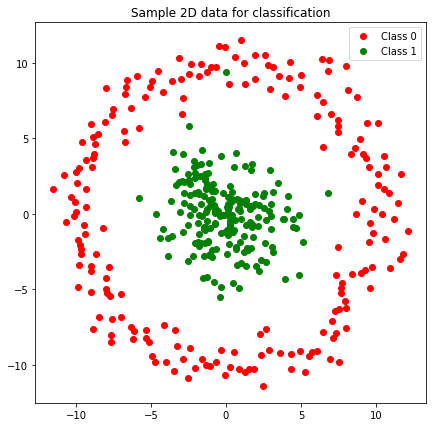

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

N=200
theta=np.linspace(0,2*np.pi,N).reshape(N,1)
Rc=10
R=Rc+np.random.normal(0,1,(N,1))
X11=R*np.cos(theta)
X12=R*np.sin(theta)
X1=np.concatenate((X11, X12), 1)

sigma=np.array([[5,0],[0,5]])
mu1 = np.array([0, 0])

X2 = np.random.multivariate_normal(mu1, sigma, N)

X = np.concatenate((np.ones((2*N, 1)),np.concatenate((X1, X2), 0) ), 1)
y = np.concatenate((np.zeros((N, 1)), np.ones((N, 1))), 0)


plt.figure(figsize = (7,7))
plt.plot(X11, X12, 'ro', label='Class 0')
plt.plot(X2[:,0],X2[:,1],'go',label='Class 1')
plt.title('Sample 2D data for classification')
plt.legend()
plt.show()

The basic algorithm:

1. Choose an arbitrary $\theta^{(1)}$
2. Let $k = 1$
3. Calculate cost and gradient of the cost function for $\theta^{(k)}$
4. Take a step $\theta^{(k+1)} \leftarrow \theta^{(k)} - \alpha \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)}) \mathbf{x}^{(i)}$
5. Let $k \leftarrow k+1$
6. If not done, repeat from step 3.

Cross entropy cost function is
$$ \ell(\theta) = \sum_{i=1}^m y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)})$$


- Degree 1:
$$f(x,y,\theta)=\theta_0+\theta_1 x+\theta_2 y$$

- Degree 2:
$$f(x,y,\theta)=\theta_0+\theta_1 x+\theta_2 y+\theta_3 x^{2}+\theta_4 y^{2}+\theta_5 xy$$

In [2]:
X=np.concatenate((X[:,:3],X[:,1:2]**2,X[:,2:3]**2,X[:,1:2]*X[:,2:3]),1)

In [3]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(z))

def crossentropy(theta, X, y, alpha):
    yhat = sigmoid(- X @ theta)
    cost = - (y * np.log(yhat) + (1 - y) * np.log(1 - yhat)).mean()
    grad_cost = X.T @ (yhat - y)
    return cost, grad_cost

## Degree 1

In [4]:
theta1 = np.zeros((3,1))
alpha = 0.000001

for epoch in range(10000):
    cost, grad_cost = crossentropy(theta1, X[:,:3], y, alpha)
    if epoch % 1000 == 0:
        print('Epoch %d: cost %f' % (epoch, cost))
    theta1 = theta1 - alpha * grad_cost

Epoch 0: cost 0.693147
Epoch 1000: cost 0.692377
Epoch 2000: cost 0.692375
Epoch 3000: cost 0.692375
Epoch 4000: cost 0.692375
Epoch 5000: cost 0.692375
Epoch 6000: cost 0.692375
Epoch 7000: cost 0.692374
Epoch 8000: cost 0.692374
Epoch 9000: cost 0.692374


## Degree 2 (Polynominal)

In [5]:
theta = np.zeros((6,1))
alpha = 0.000001


for epoch in range(400000):
    cost, grad_cost = crossentropy(theta, X, y, alpha)
    if epoch % 50000 == 0:
        print('Epoch %d: cost %f' % (epoch, cost))
    theta = theta - alpha * grad_cost


Epoch 0: cost 0.693147
Epoch 50000: cost 0.109737
Epoch 100000: cost 0.065951
Epoch 150000: cost 0.049708
Epoch 200000: cost 0.041187
Epoch 250000: cost 0.035900
Epoch 300000: cost 0.032277
Epoch 350000: cost 0.029625


Given optimal $\theta$, we can interpret the vector as defining a line
$$\theta_0+\theta_1 x+\theta_2 y=0$$
$$\theta_0+\theta_1 x+\theta_2 y+\theta_3 x^{2}+\theta_4 y^{2}+\theta_5 xy=0$$

In [6]:
def h(X, theta):
    yhat = sigmoid(- X @ theta)
    preds = np.where(yhat >= 0.5, 1, 0)
    return preds

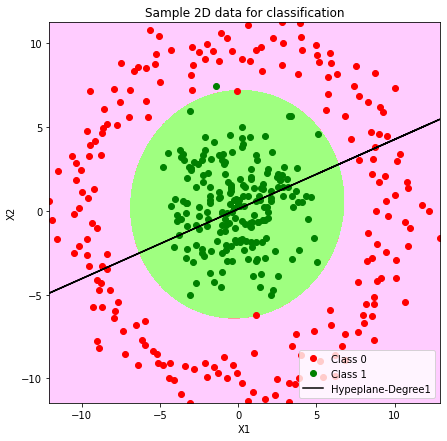

In [20]:

from matplotlib.colors import ListedColormap

plt.figure(figsize = (7,7))

plt.plot(X1[:,0], X1[:,1], 'ro', label='Class 0')
plt.plot(X2[:,0], X2[:,1], 'go', label='Class 1')

plt.plot(X[:,1], (-theta1[1,0] * X[:,1] - theta1[0,0]) / theta1[2,0],'k-',label='Hypeplane-Degree1')

custom_cmap =ListedColormap(['#ffccff','#b3fff0','#ff9999','#9fff80'])

x0, x1 = np.meshgrid(
    np.linspace(X[:, 1].min(), X[:, 1].max(), 2000).reshape(-1, 1),
    np.linspace(X[:, 2].min(), X[:, 2].max(), 2000).reshape(-1, 1)
)

#X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = np.c_[np.ones((x0.shape[0]**2, 1)).ravel(),x0.ravel(), x1.ravel(), x0.ravel()**2, x1.ravel()**2, x0.ravel()* x1.ravel()]

y_pred = h(X_new ,theta)
zz = y_pred.reshape(x0.shape)

plt.contourf(x0, x1, zz, cmap=custom_cmap)

plt.title('Sample 2D data for classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


In [8]:

preds = h(X, theta)
accuracy = (preds == y).sum() / y.shape[0]
print('Training set accuracy = %f' % accuracy)

Training set accuracy = 0.992500
